In [90]:
#Librerias necesarias para Dataframes y graficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Necesario para visualizar mis graficos, de matplotlib, en mis notebooks.
%matplotlib inline 
#Librerias para visualizaciones para mi EDA y nube de palabras
from ydata_profiling import ProfileReport
from wordcloud import WordCloud
import seaborn as sns
sns.set(style="whitegrid") #Dejo predeterminado el estilo de seaborn "whitegrid"

In [91]:
df_completo=pd.read_csv(f"Datasets/Data_ETL.csv")

Basandome solo en lo requerido por este proyecto para realizar mis APIs y mi sistema de recomendacion, procedo a seleccionar solo las columnas necesarias.

In [92]:
df_completo.drop_duplicates(inplace=True) # Elimino las filas duplicadas en el DataFrame, actualizando el existente
df_completo.drop_duplicates(subset=["id"],inplace=True) #Elimino las filas duplicadas basándose únicamente en la columna "id"
df_completo.reset_index(drop=True) #Reseteo el indice
df_completo.head(2)

budget    id original_language  \
0  30000000.0   862                en   
1  65000000.0  8844                en   

                                            overview  popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   1995-10-30   
1  When siblings Judy and Peter discover an encha...   17.015539   1995-12-15   

       revenue  runtime    status                                    tagline  \
0  373554033.0       81  Released                                        NaN   
1  262797249.0      104  Released  Roll the dice and unleash the excitement!   

   ...         idgenres               slang_name  slang_isocode  \
0  ...  [16, 35, 10751]              ['English']         ['en']   
1  ...  [12, 14, 10751]  ['English', 'Français']   ['en', 'fr']   

                                       pcompany_name          idpcompany  \
0                        ['Pixar Animation Studios']                 [3]   
1  ['TriStar Pictures', 'Teitler Film', 'Intersco...  [559, 2550, 10201]   

                  pcountry_name  pcountry_isocode  \
0  ['United States of America']            ['US']   
1  ['United States of America']            ['US']   

                                            namecast  \
0  ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...   
1  ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...   

                                              idcast          directors  
0  [31, 12898, 7167, 12899, 12900, 7907, 8873, 11...  ['John Lasseter']  
1  [2157, 8537, 205, 145151, 5149, 10739, 58563, ...   ['Joe Johnston']  

[2 rows x 28 columns]

In [93]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45334 entries, 0 to 45439
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45334 non-null  float64
 1   id                 45334 non-null  int64  
 2   original_language  45334 non-null  object 
 3   overview           44394 non-null  object 
 4   popularity         45334 non-null  float64
 5   release_date       45334 non-null  object 
 6   revenue            45334 non-null  float64
 7   runtime            45334 non-null  int64  
 8   status             45254 non-null  object 
 9   tagline            20387 non-null  object 
 10  title              45334 non-null  object 
 11  vote_average       45334 non-null  float64
 12  vote_count         45334 non-null  float64
 13  release_year       45334 non-null  int64  
 14  return             45334 non-null  float64
 15  collection_name    4485 non-null   object 
 16  idcollection       448

Cuento los valores nulos

In [94]:
df_completo.isna().sum().sort_values(ascending = False)

idcollection         40849
collection_name      40849
tagline              24947
overview               940
status                  80
budget                   0
idcast                   0
namecast                 0
pcountry_isocode         0
pcountry_name            0
idpcompany               0
pcompany_name            0
slang_isocode            0
slang_name               0
idgenres                 0
genres_name              0
return                   0
id                       0
release_year             0
vote_count               0
vote_average             0
title                    0
runtime                  0
revenue                  0
release_date             0
popularity               0
original_language        0
directors                0
dtype: int64

Como se puede apreciar, la columna tagline presenta una gran cantidad de valores faltantes, se puede deber a que no toda pelicula tiene una frase celebre.  
Procedo a dropearla ya que no será necesaria para mi analisis.

In [95]:
df_completo.drop(columns=["tagline"], inplace=True)

Por otro lado tambien se puede ver que se tienen 940 valores faltantes en la columna overview. Procedo a analizarlos. 

In [96]:
df_completo[df_completo.overview.isna()]

budget      id original_language overview  popularity release_date  \
32            0.0   78802                fr      NaN    0.745542   1996-09-18   
300    22000000.0  161495                sv      NaN    3.395867   1995-03-01   
634           0.0  287305                de      NaN    0.066123   1996-03-21   
635           0.0  339428                de      NaN    0.002229   1996-03-14   
641           0.0   10801                de      NaN    0.821299   1996-03-06   
...           ...     ...               ...      ...         ...          ...   
45317         0.0  395767                fr      NaN    1.238471   2017-01-11   
45318         0.0  199887                en      NaN    0.704642   2013-01-04   
45353         0.0  317389                es      NaN    0.006352   1973-07-22   
45374   1254040.0  468707                fi      NaN    0.347806   2017-07-28   
45375    750000.0  280422                ru      NaN    0.201582   2014-06-05   

          revenue  runtime    status                             title  ...  \
32            0.0       50  Released                  Wings of Courage  ...   
300    12400000.0      108  Released                         Roommates  ...   
634           0.0       95  Released    Peanuts – Die Bank zahlt alles  ...   
635       65335.0       95  Released                     Happy Weekend  ...   
641           0.0       86  Released                     The Superwife  ...   
...           ...      ...       ...                               ...  ...   
45317         0.0       88  Released                            Scribe  ...   
45318         0.0       87  Released                        Over/Under  ...   
45353         0.0       95  Released     Simbad e il califfo di Bagdad  ...   
45374         0.0       90  Released  Thick Lashes of Lauri Mäntyvaara  ...   
45375         3.0        0  Released                       All at Once  ...   

          idgenres    slang_name  slang_isocode  \
32     [10749, 12]   ['English']         ['en']   
300       [18, 35]   ['English']         ['en']   
634           [35]            []             []   
635           [35]   ['Deutsch']         ['de']   
641           [35]   ['Deutsch']         ['de']   
...            ...           ...            ...   
45317         [53]  ['Français']         ['fr']   
45318         [18]   ['English']         ['en']   
45353         [12]  ['Italiano']         ['it']   
45374  [10749, 35]     ['suomi']         ['fi']   
45375     [80, 35]   ['Pусский']         ['ru']   

                                           pcompany_name           idpcompany  \
32                              ['Iwerks Entertainment']              [70801]   
300    ['Hollywood Pictures', 'Interscope Communicati...  [915, 10201, 12883]   
634                     ['Westdeutscher Rundfunk (WDR)']               [7025]   
635                          ['Senator Film Produktion']                [191]   
641                                  ['Constantin Film']                 [47]   
...                                                  ...                  ...   
45317                                ['2425 PRODUCTION']              [76298]   
45318  ['Fox Television Studios', 'Universal Cable Pr...         [6529, 7938]   
45353                  ['Roas Produzioni', 'Buton Film']       [21137, 43810]   
45374                           ['Elokuvayhtiö Oy Aamu']              [84883]   
45375        ['Кинокомпания «Lunapark»', 'Инвада фильм']       [42096, 42097]   

                                pcountry_name pcountry_isocode  \
32     ['France', 'United States of America']     ['FR', 'US']   
300              ['United States of America']           ['US']   
634                               ['Germany']           ['DE']   
635                               ['Germany']           ['DE']   
641                               ['Germany']           ['DE']   
...                                       ...              ...   
45317                   ['Belgium', 'Fran

Elimino estos valores

In [97]:
df_completo.dropna(subset=['overview'], inplace=True)


In [98]:
#Reinicio los indices
df_completo=df_completo.reset_index(drop=True)

Siguiendo, en el campo status tengo 80 valores faltantes.  
Procedo a ver los distintos tipos de valores que contiene.

In [99]:
df_completo.status.unique()


array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

Estos valores estan altamente relacionados con los valores de los campos "release_year". Los registros de status "nan", "canceled", "rumored" y "planned",  
me pueden sugerir que las peliculas no tuvieron fecha de lanzamiento aun, y por ende este campo contener valores nulos.  
Por otro lado, si tengo que mis registros de "release_year" como Released, y en mi status canceled por ejemplo, me puede sugerir que mi campo "status"  
esta desactualizado.

In [100]:
#Veo cuales son los valores unicos de mi campo release_year
np.sort(df_completo.release_year.unique())

array([1874, 1878, 1883, 1887, 1888, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2020], dtype=int64)

Como podemos ver, al no contener valores nulos mi campo "release_year", podemos concluir que mi campo "status" esta desactualizado.
Por lo tanto procedo a eliminar mi columna status.

In [101]:
df_completo.drop(columns=['status'],inplace=True)


`Aplico ydata_profiling`

In [74]:
ProfileReport(df_completo)

Summarize dataset:   0%|          | 0/5 [00:01<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ANÁLISIS DE MI REPORTE

Campo ``budget``

Pudimos determinar que tenemos el 80.1% de nuestros registros que son ceros en el campo "budget",  
lo que nos sugiere que al generarse esta base de datos no se disponia de tal informacion. Mi media general es de 4319044.7, lo cual es enorme  
pero esto se debe a que mis registros tambien contienen una maxima de 3.8 × 10^8

Campo ``original_language``

Tenemos que este campo es altamente desbalanceado, el 72.3% de sus registros representan peliculas en ingles.  
Al no utilizarlo en mi modelo o en mi API (ademas de no obtener algun otro valor informativo), procedo a eliminar este campo.

In [102]:
df_completo.drop(columns=['original_language'], inplace=True)

Columna ``popularity``

Podemos ver que tenemos una dispersion significativa si leemos la desviacion estantar de 6.06, ya que nuestro promedio es de 2.976642 y la media 1.1632385.  
Por lo cual tiene sentido, si tenemos en cuenta que nuestros valores minimos y maximos son 0 y 547.4883.  
A pesar de que nuestros datos no son muy confiables, lo mantengo por requerimiento de la API.

Columna ``release_date``

Mi campo parece normal donde, como dato de color, tengo que en el 2008-01-01 se lanzaron 135 peliculas. Procedo a dejarlo como esta.

Columna `revenue`

Se tiene el siguiente inconveniente y es que contiene en sus registros ceros, exactamente 83.4% de este campo lo son.  
Sabemos que la mayoria de estos campos con ceros representan informacion faltante. Si bien este campo no tiene un valor significativo,  
se procede a dejar por los requisitos de nuestra API.

Columna `runtime`

Podemos ver que la mediana de las peliculas es de 95 minutos que es coincidente con los 95.03 de media. Tiene una desviacion estandard elevada de 37.5,   
pero esto se  debe a que se dispone de colecciones de peliculas. A la vez, edichas colecciones representan outlayers en nuestro campo, pero si   
desestimamos los valores altos de las mismas, podemos ver que se normaliza desviacion.   
Tambien se identifican valores igual a cero lo cual nos dice que no se disponia de esta informacion.
Busco analizar por que duran tanto mis peliculas con muchos minutos de reproduccion. Parto de la idea de las peliculas mayores a 3 horas y media.

In [103]:
df_completo[df_completo["runtime"]>210]

budget      id                                           overview  \
879     4000000.0     770  An American classic in which a manipulative wo...   
1146   15000000.0     947  An epic about British officer T.E. Lawrence's ...   
1168   30000000.0     311  A former Prohibition-era Jewish gangster retur...   
1226   15000000.0     665  Ben-Hur is a 1959 epic film directed by Willia...   
1244   23000000.0   10341  Until The End of the World is an odyssey for t...   
...           ...     ...                                                ...   
43727         0.0  128733  The definitive documentary about the American ...   
43731         0.0  461805  Academy Award-winning filmmaker, Oliver Stone ...   
43948  20000000.0    2331  The film is notable for presenting a more huma...   
44353         0.0   42652  A Russian version of the classic Alexandre Dum...   
44390         0.0  111109  An artist struggles to finish his work while a...   

       popularity release_date      revenue  runtime  \
879     14.240357   1939-12-15  400176459.0      238   
1146    10.893332   1962-12-10   69995385.0      216   
1168    32.182851   1984-02-16          0.0      229   
1226    14.319743   1959-12-26  146900000.0      212   
1244     2.146520   1991-09-12          0.0      287   
...           ...          ...          ...      ...   
43727    0.055713   1980-02-09          0.0      780   
43731    0.642527   2017-06-12          0.0      240   
43948    2.524781   1999-12-25          0.0      240   
44353    0.243401   1988-01-01          0.0      270   
44390    0.178241   2011-11-17          0.0      360   

                             title  vote_average  vote_count  ...  \
879             Gone with the Wind           7.7       995.0  ...   
1146            Lawrence of Arabia           7.8       870.0  ...   
1168   Once Upon a Time in America           8.3      1104.0  ...   
1226                       Ben-Hur           7.5       660.0  ...   
1244    Until the End of the World           6.3        45.0  ...   
...                            ...           ...         ...  ...   
43727                    Hollywood           8.0         1.0  ...   
43731         The Putin Interviews           8.1         8.0  ...   
43948                        Jesus           5.4         8.0  ...   
44353    The Prisoner of If Castle           5.0         3.0  ...   
44390          Century of Birthing           9.0         3.0  ...   

                  idgenres                                         slang_name  \
879     [18, 10749, 10752]                                        ['English']   
1146   [12, 18, 36, 10752]                   ['العربية', 'English', 'Türkçe']   
1168              [18, 80]                ['English', 'Français', 'Italiano']   
1226      [28, 12, 18, 36]                                        ['English']   
1244     [53, 18, 878, 28]  ['English', 'Français', 'Deutsch', 'Italiano',...   
...                    ...                                                ...   
43727                   []                                                 []   
43731                 [99]                             ['English', 'Pусский']   
43948             [36, 18]               ['English', 'Italiano', 'Português']   
44353                 [12]                                        ['Pусский']   
44390                 [18]                                               ['']   

                        slang_isocode  \
879                            ['en']   
1146               ['ar', 'en', 'tr']   
1168               ['en', 'fr', 'it']   
1226                           ['en']   
1244   ['en', 'fr', 'de', 'it', 'ja']   
...                               ...   
43727                              []   
43731                    ['en', 'ru']   
43948              ['en', 'it', 'pt']   
44353                          ['ru']   
44390                          ['tl']   

                                           pcompany_name  \
879    ['Selznick Inte

In [104]:
df_completo[df_completo["runtime"]>500]

budget      id                                           overview  \
6717           0.0   42044  Claude Lanzmann directed this 9 1/2 hour docum...   
9085           0.0   30983  Tom Hanks, Imagine Entertainment and HBO prese...   
12879          0.0  118309  The life of one of the USA's Founding Fathers,...   
13007          0.0   17800  Steven Spielberg executive produced this TNT m...   
13712          0.0   45560  Berlin Alexanderplatz, originally broadcast in...   
13896          0.0   67463  This epic tale of a family and their rural lif...   
18494          0.0   26397  This highly acclaimed mini series traces the c...   
19017          0.0  208988  The War is a seven episode documentary miniser...   
19805          0.0  142051  A survey of the musical form's history and maj...   
20780          0.0  194668  Ric Burns (brother of the famed documentarian ...   
20791          0.0   86282  Filmed between 1999 and 2001, WEST OF THE TRAC...   
23928          0.0   67493  The economic and cultural growth of Colorado s...   
25686          0.0   18729  Two friends, one northern and one southern, st...   
26376          0.0  150004  Taken spans five decades and four generations,...   
26485          0.0  266314  A 13-hour mini-series detailing James A. Michn...   
27336  120000000.0  189197  A 10-part mini-series from the creators of "Ba...   
27533          0.0  125336  The Story of Film: An Odyssey, written and dir...   
30958          0.0  206514  Tracing the lives of several Roman emperors, t...   
34084          0.0  293603  A documentary that weaves together the stories...   
34128          0.0  189215  Oliver Stone documentary charted the post-WW2 ...   
34146          0.0   38430  The series is based on a true story of a Russi...   
35409          0.0  377136  The year is 1946. World War II is over, but it...   
36775          0.0   62241  Ewan McGregor and Charley Boorman return for a...   
37711   24000000.0   75926  Framed around Queen Victoria's decision on Eng...   
38298          0.0  192040  A documentary miniseries described by its make...   
40086          0.0  126820  Chronicles the sport's signature people, place...   
42244  125000000.0  331214  Drawn from interviews with survivors of Easy C...   
43037          0.0  364150  The multigenerational saga of the rise and fal...   
43168          0.0  444623             TV miniseries of the Dostoevsky novel.   
43727          0.0  128733  The definitive documentary about the American ...   

       popularity release_date  revenue  runtime  \
6717     1.978031   1985-11-01      0.0      566   
9085     3.223150   1998-04-05      0.0      720   
12879    2.794764   2008-03-16      0.0      501   
13007    0.920023   2005-06-10      0.0      552   
13712    2.255785   1980-08-28      0.0      931   
13896    0.016204   1984-09-16      0.0      925   
18494    3.431403   1990-09-23      0.0      680   
19017    0.487489   2007-09-23      0.0      874   
19805    1.507756   2001-01-09      0.0     1140   
20780    0.316897   1999-11-14      0.0      600   
20791    0.434620   2002-04-26      0.0      551   
23928    0.664727   1978-10-01      0.0     1256   
25686    2.238623   1985-11-03      0.0      561   
26376   10.628230   2002-12-02      0.0      877   
26485    0.632363   1985-04-13      0.0      600   
27336    6.092242   2010-03-15      0.0      540   
27533    1.502510   2011-09-03      0.0      900   
30958    1.648537   1976-09-20      0.0      669   
34084    0.824032   2014-09-15      0.0      840   
34128    1.373160   2012-11-12      0.0      585   
34146    0.977018   1973-01-01      0.0      840   
35409    0.132189   2007-01-10      0.0      644   
36775    1.097027   2010-11-30      0.0      543   
37711    0.661658   1986-11-24      0.0      523   
38298    4.501137   2006-12-10      0.0      550   
40086    0.145073   1994-09-18      0.0     1140   
42244    7.903731   2001-09-09      0.0      705   
43037    0.001429   1992-10-17      0.0     

In [105]:
df_completo[df_completo["runtime"]>=500]['genres_name']

6717                                       ['Documentary']
9085                              ['Documentary', 'Drama']
12879                                 ['History', 'Drama']
13007                    ['Adventure', 'Drama', 'Western']
13712                                            ['Drama']
13896                                 ['Drama', 'History']
18494                                      ['Documentary']
19017                    ['Documentary', 'History', 'War']
19805                                      ['Documentary']
20780                                                   []
20791                                      ['Documentary']
23928                                 ['Drama', 'History']
25686                      ['Drama', 'History', 'Western']
26376                                  ['Science Fiction']
26485                                ['Drama', 'TV Movie']
27336    ['Action', 'Adventure', 'Drama', 'History', 'W...
27533                                      ['Documentary

Se puede verificar que la mayor parte de estos generos correponden a documentales o peliculas de drama.
Algunos campos estan vacios, asi que voy a suponer que se puede tratar de algunas pelicuas de cine experimental independiente, ya que se 
caracteriza por desafiar las convenciones narrativas, estéticas y técnicas tradicionales.
Adicionalmente tambien se puede ver que se contienen registros mayores a 500 minutos que son series y documentales. Procedo a eliminar estos valores  
ya que el proposito de mi API son las peliculas normales y en el sistema de recomendacion tampoco voy utilizar esa informacion.

In [106]:
df_completo=df_completo[df_completo['runtime']<500]
df_completo=df_completo.reset_index(drop=True)

Columna `title`

Con nuestro analisis solo podemos visualizar cuales registros son los que mas se repiten como Cinderella (11), Hamlet (9), Les Misérables (8), Beauty and the Beast (8) y Alice in Wonderland (8). Fuera de esto, no puedo tener algun otro dato de valor y por ende, voy a proceder a aplicar una nube de palabras para tener  
informacion mas relevante.

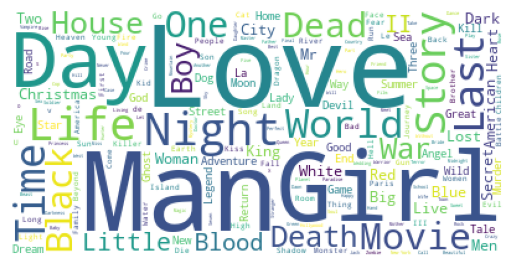

In [107]:
wordcloud2 = WordCloud(background_color ='white').generate(' '.join(df_completo['title']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

Ahora, con esto, podemos inferir en que las palabras que mas abundan en nuestros titulos son Love, Girl, Man, Life, House, Little, Night y muchas mas.  
Entonces, se puede deci que estos nombres nos sugieren peliculas de genereo romantico, drama y comedia romantica.

Columna `vote_average`

Dado el histograma de mi reporte, podemos ver que tenemos muchas reseñas iguales a cero. Mi promedio es de 5.6445781 y mi desviacion estandar es de 1.8882119  
lo cual el sesgamiento es adecuado si tenemos en cuenta que la mayoria de nuestras variables son ceros. La voy a mantener para la API.

Columna `release_year`

Podemos ver que los años donde mas lanzamientos tuvo fueron 2014 (1915) - 4.3%, 2015 (1854)	- 4.2% y 2013 (1849) - 4.2%. Fuera de esto no existen mayores consideraciones.

Columna ``return``

Esta columna tiene una correlacion alta con budget y revenue. Nada mas que agregar.

Columna ``collection_name``

Tenemos que el 	90.0% de los datos estan faltando, lo cual nos dice que no pertenecen determinadas peliculas a una determinada coleccion o franquicia.

Columna ``idcollection``

Columna irreblevante, procedo a eliminarla.

In [108]:
df_completo.drop(columns='idcollection',inplace=True)

Columna  ``genres_name`` 

Tenemos que Drama (4904), Comedy (3370) y Documentary (2672) son los 3 generos mas vistos. Pero aun asi tenemos muchos valores faltantes pertenecientes a listas vacias [] (2135), pero como esto no afecta a la mi idea de modelo de recomendacion, la dejare como esta.

Columna ``idgenres``

Esta columna tambien es irrelevante y procedo a eliminarla.

In [109]:
df_completo.drop(columns=['idgenres'],inplace=True)

Columna ``slang_name``

Podemos ver que el idioma mas hablado en nuestras peliculas es el ingles con 22309 registros, seguido por 3526 peliculas sin algun tipo de lenguaje registrado osea valores nulos, y habladas en frances con 1730. Procedo a eliminar esta columna.

In [110]:
df_completo.drop(columns=['slang_name'], inplace=True)

Columna ``slang_isocode``

Al igual que slang_name, me representa el lenguaje de las peliculas pero con sus respectivos codigos. Procedo a eliminarla.

In [111]:
df_completo.drop(columns=['slang_isocode'], inplace=True)

Columna ``pcompany_name`` 

Esta tiene muchisimos valores faltantes (11235) seguida por la empresa Metro-Goldwyn-Mayer (MGM)' con 742 registros. Dado que el total de observaciones es de 44394, tenemos que el 25,3% corresponden a los faltantes.

Columna ``idpcompany``

Esta columna que solo contiene el id de la compania, la procedo a eliminar.

In [112]:
df_completo.drop(columns=['idpcompany'], inplace=True)

Columna `pcountry_name`

La Columna nos muestra los registros con los paises con mas peliculas producidas. Son United States of America (17804), campos nullos (5922), United Kingdom (2233), France (1568) y Japan (1350).

Columna ``pcountry_isocode``

Como es una columna irrelevante, se procede a eliminarse.

In [113]:
df_completo.drop(columns=['pcountry_isocode'], inplace=True)

Tanto como la columna ``namecast``, ``idcast`` y ``directors``, las voy a conservar para mi API.

### Exporto mi Dataset `Data_ETL_EDA` listo para poder comenzar a crear mi API y sistema de recomendacion.

In [114]:
df_completo.head()

budget     id                                           overview  \
0  30000000.0    862  Led by Woody, Andy's toys live happily in his ...   
1  65000000.0   8844  When siblings Judy and Peter discover an encha...   
2         0.0  15602  A family wedding reignites the ancient feud be...   
3  16000000.0  31357  Cheated on, mistreated and stepped on, the wom...   
4         0.0  11862  Just when George Banks has recovered from his ...   

   popularity release_date      revenue  runtime                        title  \
0   21.946943   1995-10-30  373554033.0       81                    Toy Story   
1   17.015539   1995-12-15  262797249.0      104                      Jumanji   
2   11.712900   1995-12-22          0.0      101             Grumpier Old Men   
3    3.859495   1995-12-22   81452156.0      127            Waiting to Exhale   
4    8.387519   1995-02-10   76578911.0      106  Father of the Bride Part II   

   vote_average  vote_count  release_year     return  \
0           7.7      5415.0          1995  12.451801   
1           6.9      2413.0          1995   4.043035   
2           6.5        92.0          1995   0.000000   
3           6.1        34.0          1995   5.090760   
4           5.7       173.0          1995   0.000000   

                  collection_name                         genres_name  \
0            Toy Story Collection   ['Animation', 'Comedy', 'Family']   
1                             NaN  ['Adventure', 'Fantasy', 'Family']   
2       Grumpy Old Men Collection               ['Romance', 'Comedy']   
3                             NaN      ['Comedy', 'Drama', 'Romance']   
4  Father of the Bride Collection                          ['Comedy']   

                                       pcompany_name  \
0                        ['Pixar Animation Studios']   
1  ['TriStar Pictures', 'Teitler Film', 'Intersco...   
2                 ['Warner Bros.', 'Lancaster Gate']   
3         ['Twentieth Century Fox Film Corporation']   
4   ['Sandollar Productions', 'Touchstone Pictures']   

                  pcountry_name  \
0  ['United States of America']   
1  ['United States of America']   
2  ['United States of America']   
3  ['United States of America']   
4  ['United States of America']   

                                            namecast  \
0  ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...   
1  ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...   
2  ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...   
3  ['Whitney Houston', 'Angela Bassett', 'Loretta...   
4  ['Steve Martin', 'Diane Keaton', 'Martin Short...   

                                              idcast            directors  
0  [31, 12898, 7167, 12899, 12900, 7907, 8873, 11...    ['John Lasseter']  
1  [2157, 8537, 205, 145151, 5149, 10739, 58563, ...     ['Joe Johnston']  
2       [6837, 3151, 13567, 16757, 589, 16523, 7166]    ['Howard Deutch']  
3  [8851, 9780, 18284, 51359, 66804, 352, 87118, ...  ['Forest Whitaker']  
4  [67773, 3092, 519, 70696, 59222, 18793, 14592,...    ['Charles Shyer']

In [115]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           44362 non-null  float64
 1   id               44362 non-null  int64  
 2   overview         44362 non-null  object 
 3   popularity       44362 non-null  float64
 4   release_date     44362 non-null  object 
 5   revenue          44362 non-null  float64
 6   runtime          44362 non-null  int64  
 7   title            44362 non-null  object 
 8   vote_average     44362 non-null  float64
 9   vote_count       44362 non-null  float64
 10  release_year     44362 non-null  int64  
 11  return           44362 non-null  float64
 12  collection_name  4426 non-null   object 
 13  genres_name      44362 non-null  object 
 14  pcompany_name    44362 non-null  object 
 15  pcountry_name    44362 non-null  object 
 16  namecast         44362 non-null  object 
 17  idcast      

In [116]:
df_completo.to_csv(r'Datasets/Data_ETL_EDA.csv',index=False)